### 题目四：编写 SMO 算法实现线性 SVM 分类器，对 iris 数据集进行二分类。

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import datasets
import seaborn as sns
import warnings
from SVM import SVM
# 禁用所有警告
warnings.filterwarnings('ignore', category=FutureWarning)
# 设置字体为 SimHei（黑体），支持中文显示
rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
rcParams['axes.unicode_minus'] = False   # 正常显示负号

#### （1）选取两个特征和两类数据进行二分类。
注意：二分类标签为 1 和-1。

In [30]:
# 加载数据集
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # 选择花瓣长度和花瓣宽度
y = iris.target

# 选择类别 0 和类别 1
X = X[y != 2]
y = y[y != 2]

# 将标签转换为 -1 和 1
y = np.where(y == 0, -1, 1)

#### （2）划分数据（分成训练集和数据集）

In [31]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = X.shape[0]
    test_size = int(num_samples * test_size)

    indices = np.random.permutation(num_samples)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### （3）数据归一化

In [32]:
class MyStandardScaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

scaler = MyStandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### （4）训练模型

In [33]:
svm = SVM(C=1.0)
svm.fit(X_train, y_train)

#### （5）输出：SVM 对偶问题目标函数的最优解𝛼，决策函数的参数和截距，支持向量等。

In [34]:
print("拉格朗日乘子 α：")
print(svm.alpha)
print("\n决策函数的权重向量 w：")
print(svm.w)
print("\n截距 b：")
print(svm.b)
print("\n支持向量：")
print(svm.support_vectors_)


拉格朗日乘子 α：
[0.00000000e+00 0.00000000e+00 1.73472348e-17 0.00000000e+00
 1.40236830e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.71812197e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.73472348e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.06616765e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.01307973e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24135877e-02 1.70846176e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+0

#### （6）可视化：通过散点图可视化训练数据样本，并画出决策面和 2 个最大间隔面，标出支持向量（包括间隔上和间隔内的样本），能够帮助检验算法正确性。

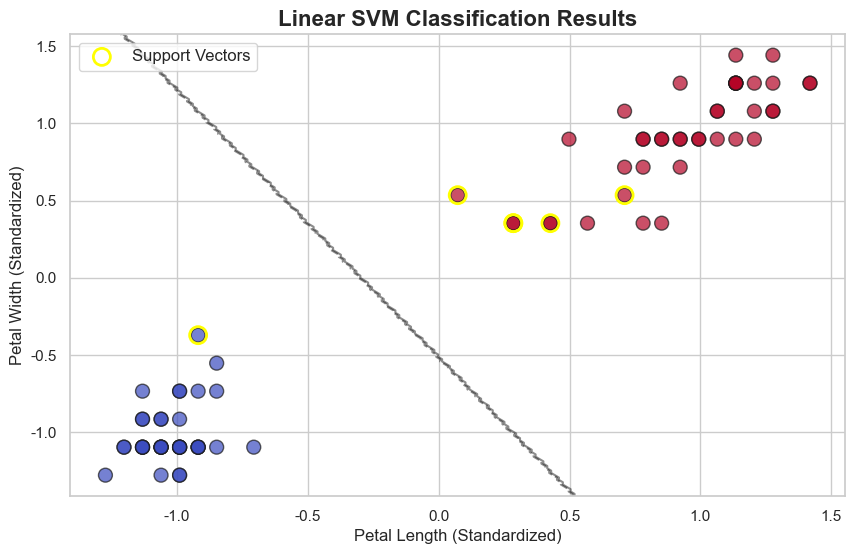

In [35]:
def plot_svm(svm, X, y):
    # 设置 Seaborn 的样式
    sns.set(style="whitegrid", palette="muted")
    
    # 创建图形和坐标轴
    plt.figure(figsize=(10, 6))

    # 绘制数据点
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k', s=100)

    # 绘制决策边界
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx = np.linspace(x_min, x_max, 200)
    yy = np.linspace(y_min, y_max, 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.predict(xy).reshape(XX.shape)
    
    # 绘制等高线决策边界
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # 标注支持向量
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=150, linewidth=2,
                facecolors='none', edgecolors='yellow', label='Support Vectors')

    # Chart title and labels
    plt.title("Linear SVM Classification Results", fontsize=16, weight='bold')
    plt.xlabel("Petal Length (Standardized)", fontsize=12)
    plt.ylabel("Petal Width (Standardized)", fontsize=12)
    
    # Add legend
    plt.legend(loc='upper left', fontsize=12)

    # 显示图形
    plt.show()

# 使用示例
plot_svm(svm, X_train, y_train)

#### （7）测试集数据进行预测，评估模型性能。

In [36]:
def accuracy_score(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("y_true 和 y_pred 的长度必须相同")
    # 计算正确预测的数量
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    # 计算准确率
    accuracy = correct_predictions / len(y_true)
    return accuracy


y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集上的准确率：{accuracy * 100:.2f}%")


测试集上的准确率：100.00%


#### 【讨论七】请根据实验结果描述软间隔 SVM 中的 C 参数、拉格朗日乘子α、支持向量与最优决策面和间隔区域之间的关系。

### 软间隔 SVM 中 C 参数、拉格朗日乘子 α、支持向量与最优决策面和间隔区域之间的关系

**1. C 参数的作用与影响：**

在软间隔 SVM 中，C 参数是惩罚项的控制参数，它在优化过程中平衡了最大化间隔和最小化分类误差之间的关系。具体来说：

- **C 值较大**：此时模型对分类错误的容忍度较低，优化时会更倾向于减小误分类点的数量，导致间隔较窄。过大的 C 值可能会导致模型过拟合，因为它严格要求每个训练样本都被正确分类，从而使得间隔缩小并且对噪声敏感。
  
- **C 值较小**：较小的 C 值允许一些误分类发生，模型将更多关注最大化间隔而非完全消除误分类。这种情况下，间隔较宽，有助于提高模型的泛化能力，但可能牺牲一些训练数据的分类准确性。小 C 值使得 SVM 更加容忍噪声和异常值。

C 参数的选择直接影响最终的决策边界，特别是支持向量的数量和分布。一个较小的 C 值通常会导致更多的支持向量，决策边界更平滑；而一个较大的 C 值则倾向于减少支持向量，使决策边界更复杂且可能不具有良好的泛化能力。

**2. 拉格朗日乘子 α 的意义：**

拉格朗日乘子 α 是软间隔 SVM 中的重要概念，它与每个样本点的权重相关，并用于约束条件的处理。具体来说，α 的作用是反映样本对决策面影响的大小：

- **α 为零**：样本点位于间隔外部，对决策面没有影响；
- **0 < α < C**：样本点位于间隔边界上，成为支持向量。支持向量是决定决策边界的关键样本，只有它们对模型有直接的影响；
- **α = C**：样本点位于间隔边界内或被误分类，对决策面影响极大。此类样本往往是在错误分类的情况下被推入支持向量中。

因此，拉格朗日乘子 α 的大小直接决定了哪些样本成为支持向量，支持向量是模型的“关键点”，它们对最优决策面的位置和形状起着决定性作用。

**3. 支持向量的角色：**

支持向量是 SVM 模型中最重要的样本，它们位于决策边界的边缘或间隔区域内。支持向量的选择对最优决策面的确定至关重要：

- **支持向量的选择**：只有那些在间隔边界上（或者在间隔内被误分类的）样本才会成为支持向量。它们是模型中最具代表性的数据点，对决策面的位置有决定性影响。其他不在边界上的样本，即使被正确分类，也对决策面没有直接作用。

- **支持向量的数量**：支持向量的数量受到 C 参数的控制。较大的 C 值通常会导致较少的支持向量，因为模型更倾向于尽量减少分类错误；而较小的 C 值则允许更多样本作为支持向量，从而得到较宽的间隔。

**4. 最优决策面与间隔区域：**

最优决策面是通过支持向量确定的超平面，它划分了两个类别的样本点。这个决策面是 SVM 中的核心目标，它使得两类样本之间的间隔最大化。最优决策面的数学表示为：

$$
w^T x + b = 0
$$

其中，w 是权重向量，b 是偏置项。间隔的宽度由支持向量与决策面的距离决定，理想情况下，支持向量的距离等于间隔宽度的一半。具体来说，间隔宽度是：

$$
\text{h} = \frac{2}{\|w\|}
$$
